# Problem Statement

Rainfall Prediction Using Artificial Neural Network on Multi-City Weather Data 
(2024–2025):

To design, train, and evaluate an **Artificial Neural Network (ANN)** that predicts whether it will rain the next day using historical weather data. 

**Keywords** - Data preprocessing, feature engineering, and ANN architectures.

Dataset Link - [Download](https://www.kaggle.com/datasets/waqi786/usa-rainfall-prediction-dataset-2024-2025/data)



In [34]:
# import dependancies

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

import warnings
warnings.filterwarnings('ignore')

In [35]:
# Reading dataset

dataset = pd.read_csv("usa_rain_prediction_dataset_2024_2025.csv")
dataset.head()

,Date,Location,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow
0,2024-01-01,New York,87.524795,75.655455,28.379506,0.000000,69.617966,1026.030278,0
1,2024-01-02,New York,83.259325,28.712617,12.436433,0.526995,41.606048,995.962065,0
2,2024-01-03,New York,80.943050,64.740043,14.184831,0.916884,77.364763,980.796739,1
3,2024-01-04,New York,78.097552,59.738984,19.444029,0.094134,52.541196,979.012163,0
4,2024-01-05,New York,37.059963,34.766784,3.689661,1.361272,85.584000,1031.790859,0


In [36]:
# check last five samples

dataset.tail()

,Date,Location,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow
73095,2025-12-27,Washington D.C.,40.614393,65.099438,28.778327,0.000000,54.168514,977.083747,0
73096,2025-12-28,Washington D.C.,52.641643,30.610525,12.282890,0.871000,22.068055,980.591675,0
73097,2025-12-29,Washington D.C.,56.492591,96.740232,2.894762,1.191956,52.336048,1016.469174,1
73098,2025-12-30,Washington D.C.,65.748956,63.900004,24.632400,0.483421,76.785280,1032.396146,1
73099,2025-12-31,Washington D.C.,54.648609,80.812021,22.722505,0.151903,19.674960,974.835534,0


In [37]:
# Random 10 samples

dataset.sample(10)

,Date,Location,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow
10643,2025-02-13,Chicago,30.934210,62.658213,10.470018,0.037063,59.443350,978.563812,0
27382,2024-12-01,San Diego,60.854379,52.041188,29.016176,0.597865,33.633352,1005.374694,0
26561,2024-09-02,San Diego,58.115774,94.083346,21.845968,0.000000,67.435329,1010.202442,0
56035,2025-04-24,Charlotte,72.872069,42.490670,23.037581,0.000000,74.537526,997.754613,0
43698,2025-07-23,Jacksonville,82.257066,70.439123,22.142417,0.000000,40.980751,985.700331,0
35748,2025-10-22,San Jose,36.556351,99.891389,12.749231,0.360568,61.634297,1034.571163,1
60579,2025-09-29,San Francisco,38.031446,78.192620,14.390553,0.253711,14.143639,1029.848225,0
31765,2024-11-28,Dallas,68.967265,83.148456,1.556800,0.835757,72.655684,1033.135179,1
19121,2024-04-25,Philadelphia,44.016675,57.710593,28.300749,0.000000,13.223136,1033.983091,0
26779,2025-04-08,San Diego,64.872088,50.263783,18.251980,0.475948,14.041571,1018.918925,0


In [38]:
# check what are different features

print(dataset.columns.to_list())

['Date', 'Location', 'Temperature', 'Humidity', 'Wind Speed', 'Precipitation', 'Cloud Cover', 'Pressure', 'Rain Tomorrow']


In [39]:
# Dataset shape

print(dataset.shape)

(73100, 9)


In [40]:
# Basic info

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           73100 non-null  object 
 1   Location       73100 non-null  object 
 2   Temperature    73100 non-null  float64
 3   Humidity       73100 non-null  float64
 4   Wind Speed     73100 non-null  float64
 5   Precipitation  73100 non-null  float64
 6   Cloud Cover    73100 non-null  float64
 7   Pressure       73100 non-null  float64
 8   Rain Tomorrow  73100 non-null  int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 5.0+ MB


Dataset hasn't missing values and all freatures are numeric except Date and Location

In [41]:
# Again check missing values

dataset.isnull().sum()

Date             0
Location         0
Temperature      0
Humidity         0
Wind Speed       0
Precipitation    0
Cloud Cover      0
Pressure         0
Rain Tomorrow    0
dtype: int64

In [42]:
# 5 Point summary

dataset.describe()

,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow
count,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000
mean,65.182270,59.875041,15.017946,0.390635,54.942807,1005.176013,0.220410
std,20.205793,23.066115,8.668729,0.474833,25.982487,20.203889,0.414526
min,30.000766,20.000272,0.000712,0.000000,10.000856,970.000919,0.000000
25%,47.678968,39.800732,7.485182,0.000000,32.318668,987.697646,0.000000
50%,65.294949,59.887840,15.102495,0.196909,55.011121,1005.284188,0.000000
75%,82.636570,79.835990,22.551794,0.673177,77.412469,1022.727410,0.000000
max,99.997393,99.999025,29.999017,3.078090,99.998957,1039.999765,1.000000


# Exploratory Data Analysis

In [43]:
# drop date

dataset.drop(columns='Date',axis=1,inplace=True)

In [44]:
dataset.head()

,Location,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow
0,New York,87.524795,75.655455,28.379506,0.000000,69.617966,1026.030278,0
1,New York,83.259325,28.712617,12.436433,0.526995,41.606048,995.962065,0
2,New York,80.943050,64.740043,14.184831,0.916884,77.364763,980.796739,1
3,New York,78.097552,59.738984,19.444029,0.094134,52.541196,979.012163,0
4,New York,37.059963,34.766784,3.689661,1.361272,85.584000,1031.790859,0


In [45]:
# Analyze Target feature

dataset['Rain Tomorrow']

0        0
1        0
2        1
3        0
4        0
        ..
73095    0
73096    0
73097    1
73098    1
73099    0
Name: Rain Tomorrow, Length: 73100, dtype: int64

In [46]:
print(dataset['Rain Tomorrow'].value_counts())

Rain Tomorrow
0    56988
1    16112
Name: count, dtype: int64


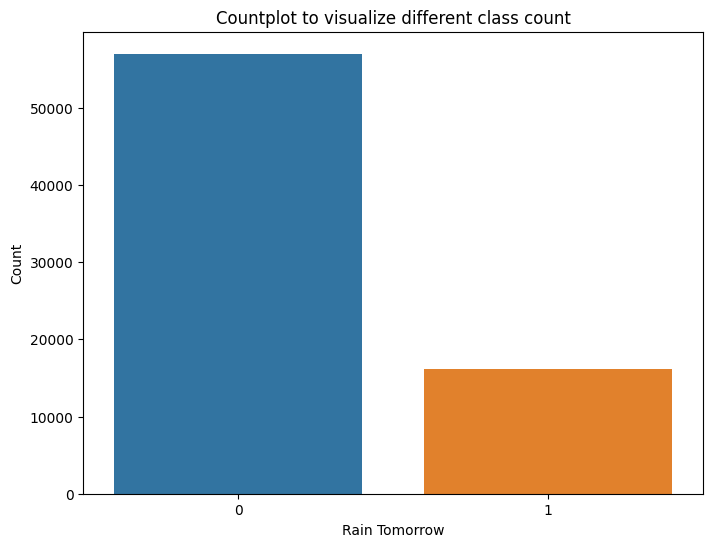

In [47]:
# Countplot to visualize different class count

plt.figure(figsize = (8,6))
sns.countplot(x = 'Rain Tomorrow', data = dataset, palette='tab10')
plt.title("Countplot to visualize different class count")
plt.xlabel("Rain Tomorrow")
plt.ylabel("Count")

plt.show()

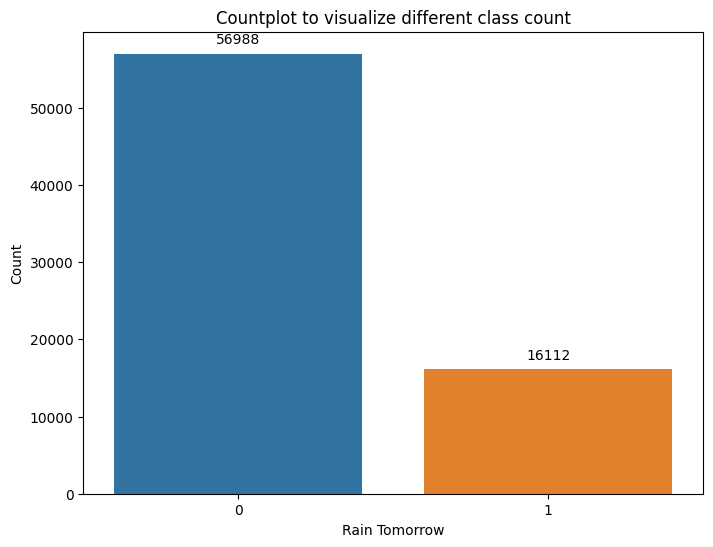

In [48]:
# Countplot to visualize different class count

plt.figure(figsize = (8,6))
ax = sns.countplot(x = 'Rain Tomorrow', data = dataset, palette='tab10')
plt.title("Countplot to visualize different class count")
plt.xlabel("Rain Tomorrow")
plt.ylabel("Count")

for container in ax.containers:
    ax.bar_label(container, padding=5)
    
plt.show()

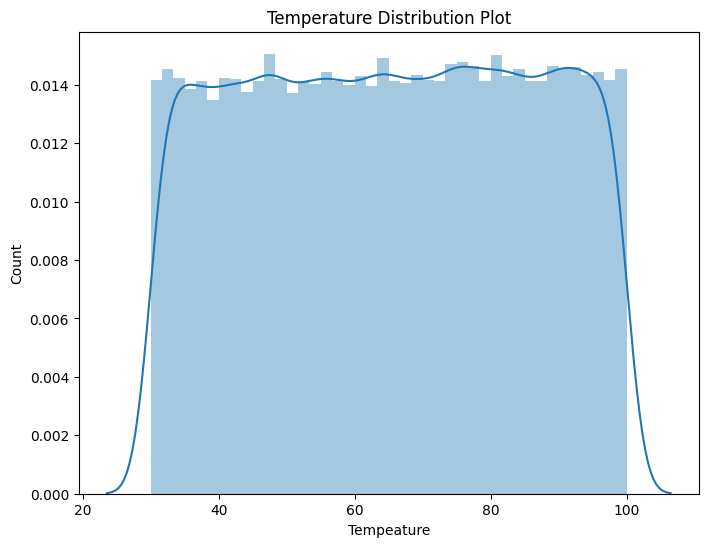

In [49]:
# Data distribution of Temperature

plt.figure(figsize = (8,6))
sns.distplot(dataset['Temperature'])
plt.title("Temperature Distribution Plot")
plt.xlabel("Tempeature")
plt.ylabel("Count")
    
plt.show()

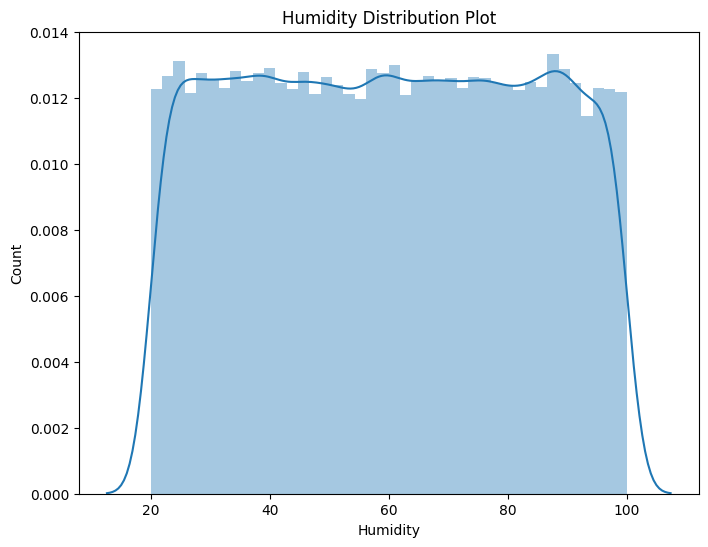

In [50]:
# Data distribution of Humidity

plt.figure(figsize = (8,6))
sns.distplot(dataset['Humidity'])
plt.title("Humidity Distribution Plot")
plt.xlabel("Humidity")
plt.ylabel("Count")
    
plt.show()

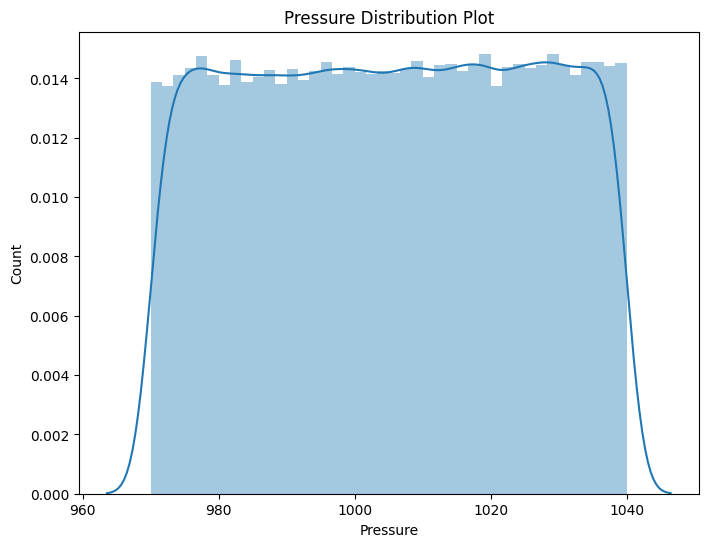

In [51]:
# Data distribution of Pressure

plt.figure(figsize = (8,6))
sns.distplot(dataset['Pressure'])
plt.title("Pressure Distribution Plot")
plt.xlabel("Pressure")
plt.ylabel("Count")
    
plt.show()

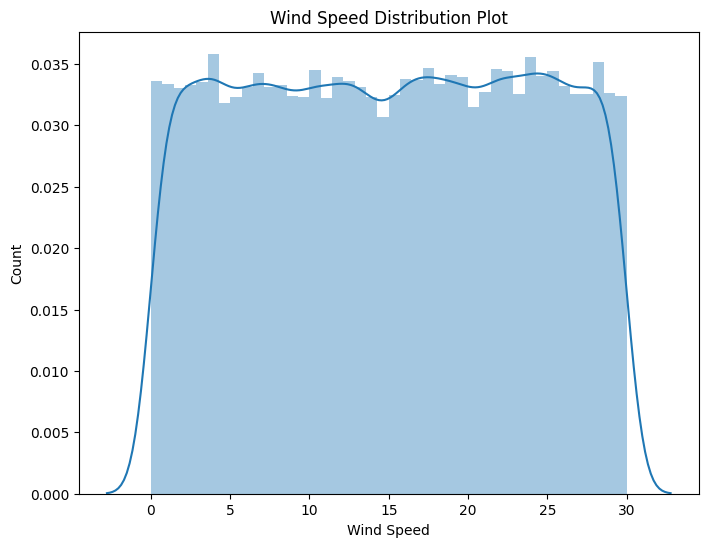

In [52]:
# Data distribution of Wind Speed	

plt.figure(figsize = (8,6))
sns.distplot(dataset['Wind Speed'])
plt.title("Wind Speed Distribution Plot")
plt.xlabel("Wind Speed")
plt.ylabel("Count")
    
plt.show()

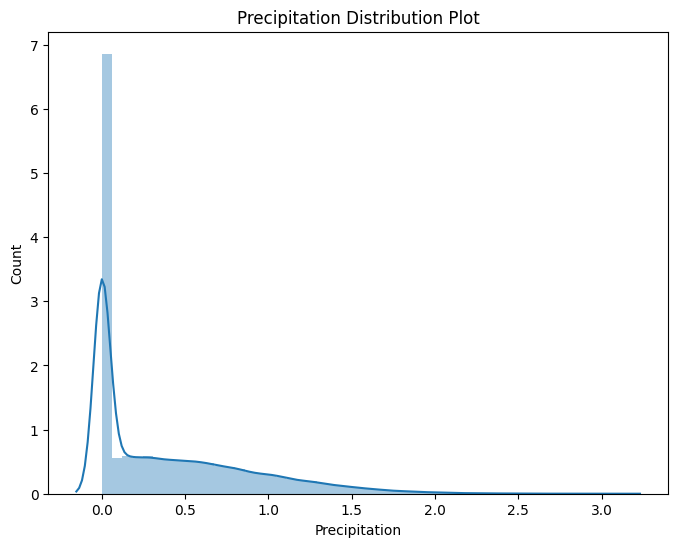

In [53]:
# Data distribution of Precipitation	

plt.figure(figsize = (8,6))
sns.distplot(dataset['Precipitation'])
plt.title("Precipitation Distribution Plot")
plt.xlabel("Precipitation")
plt.ylabel("Count")
    
plt.show()

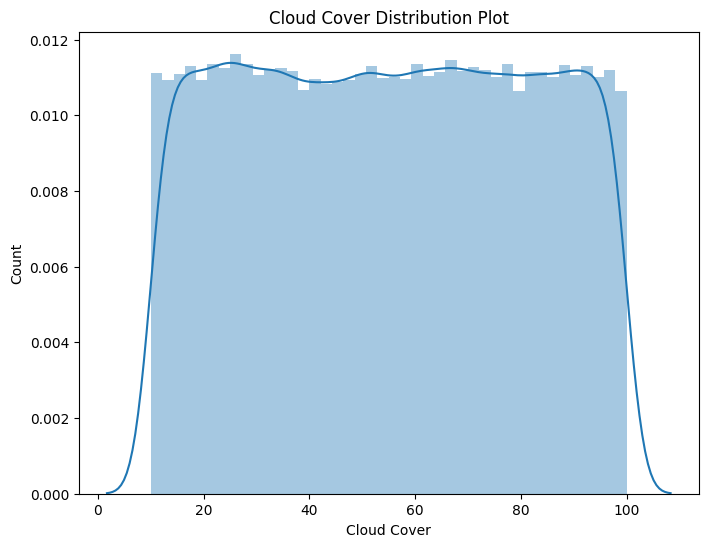

In [54]:
# Data distribution of Cloud Cover	

plt.figure(figsize = (8,6))
sns.distplot(dataset['Cloud Cover'])
plt.title("Cloud Cover Distribution Plot")
plt.xlabel("Cloud Cover")
plt.ylabel("Count")
    
plt.show()

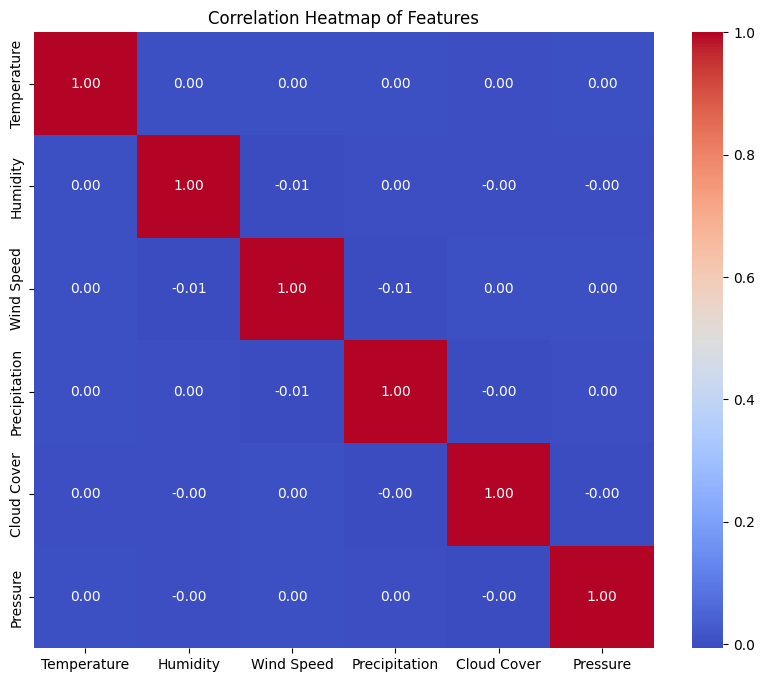

In [55]:
# Correlation heatmap

dataset_num = dataset[['Temperature', 'Humidity', 'Wind Speed', 'Precipitation', 'Cloud Cover', 'Pressure']]

# Plot heatmap to visualize correlations between features
plt.figure(figsize=(10, 8))
sns.heatmap(dataset_num.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()

In [56]:
# Categorical Features

cat_feature = [feature for feature in dataset.columns if dataset[feature].dtype == 'object']

In [57]:
cat_feature

['Location']

In [58]:
# converting 'Location' into numerical feature

dataset = pd.get_dummies(dataset, columns=['Location'], drop_first=True, dtype='int')

dataset.head()

,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow,Location_Charlotte,Location_Chicago,Location_Columbus,...,Location_Los Angeles,Location_New York,Location_Philadelphia,Location_Phoenix,Location_San Antonio,Location_San Diego,Location_San Francisco,Location_San Jose,Location_Seattle,Location_Washington D.C.
0,87.524795,75.655455,28.379506,0.000000,69.617966,1026.030278,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,83.259325,28.712617,12.436433,0.526995,41.606048,995.962065,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,80.943050,64.740043,14.184831,0.916884,77.364763,980.796739,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,78.097552,59.738984,19.444029,0.094134,52.541196,979.012163,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,37.059963,34.766784,3.689661,1.361272,85.584000,1031.790859,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [59]:
# Split independent feature and Target feature

X = dataset.drop('Rain Tomorrow', axis=1)
y = dataset['Rain Tomorrow']

In [60]:
X.head()

,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Location_Charlotte,Location_Chicago,Location_Columbus,Location_Dallas,...,Location_Los Angeles,Location_New York,Location_Philadelphia,Location_Phoenix,Location_San Antonio,Location_San Diego,Location_San Francisco,Location_San Jose,Location_Seattle,Location_Washington D.C.
0,87.524795,75.655455,28.379506,0.000000,69.617966,1026.030278,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,83.259325,28.712617,12.436433,0.526995,41.606048,995.962065,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,80.943050,64.740043,14.184831,0.916884,77.364763,980.796739,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,78.097552,59.738984,19.444029,0.094134,52.541196,979.012163,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,37.059963,34.766784,3.689661,1.361272,85.584000,1031.790859,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [61]:
X.tail()

,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Location_Charlotte,Location_Chicago,Location_Columbus,Location_Dallas,...,Location_Los Angeles,Location_New York,Location_Philadelphia,Location_Phoenix,Location_San Antonio,Location_San Diego,Location_San Francisco,Location_San Jose,Location_Seattle,Location_Washington D.C.
73095,40.614393,65.099438,28.778327,0.000000,54.168514,977.083747,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
73096,52.641643,30.610525,12.282890,0.871000,22.068055,980.591675,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
73097,56.492591,96.740232,2.894762,1.191956,52.336048,1016.469174,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
73098,65.748956,63.900004,24.632400,0.483421,76.785280,1032.396146,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
73099,54.648609,80.812021,22.722505,0.151903,19.674960,974.835534,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [62]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: Rain Tomorrow, dtype: int64

In [63]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [64]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(51170, 25) (51170,) (21930, 25) (21930,)


In [65]:
# Standardize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [66]:
# Building Neural Network

model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,289 (16.75 KB)

 Trainable params: 4,289 (16.75 KB)

 Non-trainable params: 0 (0.00 B)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [67]:
# Visualize the model architecture
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [68]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [69]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=30, batch_size=32)


Epoch 1/30
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8829 - loss: 0.2512 - val_accuracy: 0.9865 - val_loss: 0.0336
Epoch 2/30
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9876 - loss: 0.0302 - val_accuracy: 0.9897 - val_loss: 0.0228
Epoch 3/30
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.9918 - loss: 0.0196 - val_accuracy: 0.9872 - val_loss: 0.0310
Epoch 4/30
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.9918 - loss: 0.0182 - val_accuracy: 0.9903 - val_loss: 0.0198
Epoch 5/30
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9941 - loss: 0.0139 - val_accuracy: 0.9914 - val_loss: 0.0209
Epoch 6/30
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.9947 - loss: 0.0131 - val_accuracy: 0.9930 - val_loss: 0.0156
Epoch 7/30
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9961 - loss: 0.0099 - val_accuracy: 0.9909 - val_loss: 0.0194
Epoch 8/30
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9951 - loss: 0.01

In [70]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

686/686 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9955 - loss: 0.0150
Test Accuracy: 0.9954


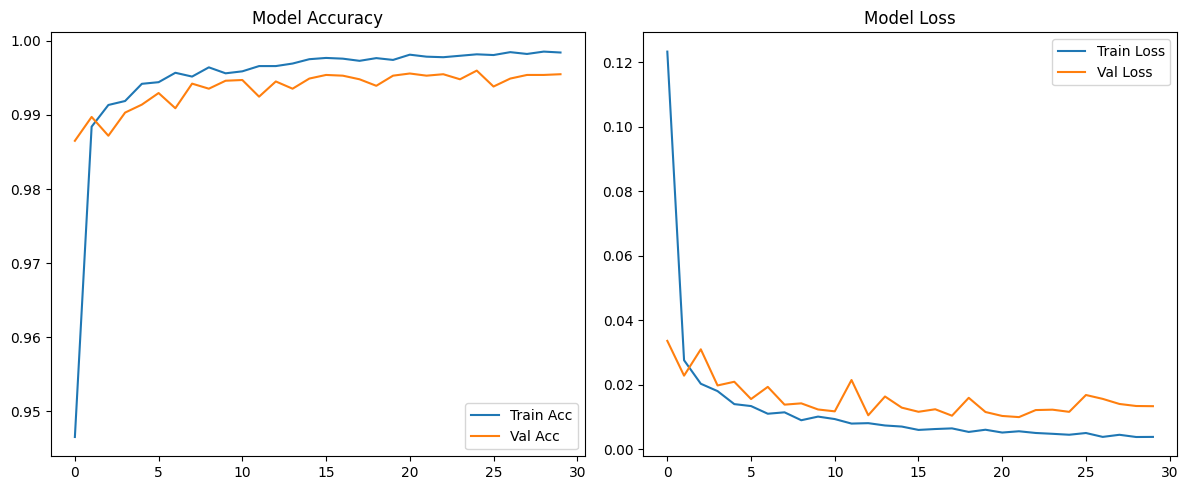

In [71]:
# Plot training and validation accuracy/loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [132]:
# Predictions on test data
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

686/686 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [133]:
y_pred[:10]

array([[0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0]])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17062
           1       0.99      0.99      0.99      4868

    accuracy                           0.99     21930
   macro avg       0.99      0.99      0.99     21930
weighted avg       0.99      0.99      0.99     21930



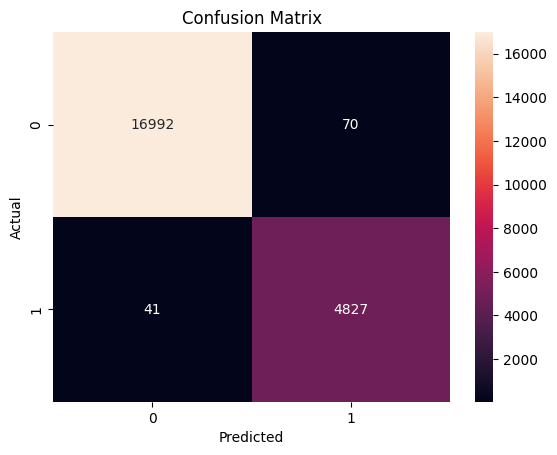

In [134]:
# Prediction

print(classification_report(y_test, y_pred))            # Print precision, recall, F1

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

686/686 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


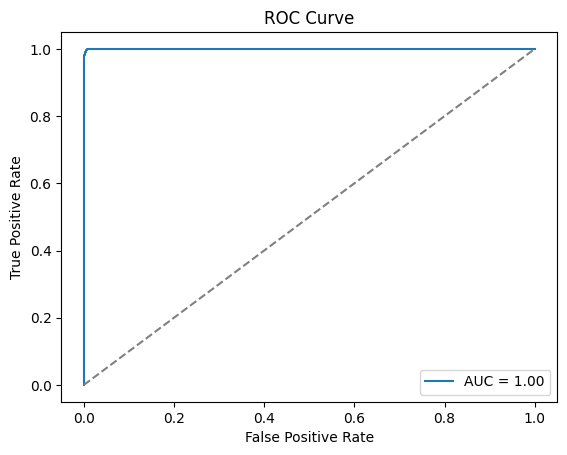

In [136]:
# Plot ROC curve
y_proba = model.predict(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.2f}")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

#### Model with Earlystop

In [72]:
model2 = Sequential()
model2.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model2.add(Dense(32, activation='relu'))        
model2.add(Dense(16, activation='relu'))  
model2.add(Dense(1, activation='sigmoid'))      
model2.summary()
plot_model(model2, show_shapes=True, show_layer_names=True, to_file='model2.png')

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 64)             │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,289 (16.75 KB)

 Trainable params: 4,289 (16.75 KB)

 Non-trainable params: 0 (0.00 B)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [ ]:
# Loading Library for early stop

from keras.callbacks import EarlyStopping

In [74]:
# PATIENT EARLY STOPPING
es = EarlyStopping(
    monitor='val_loss', 
    mode='min', 
    verbose=1, 
    patience=3,
    restore_best_weights=True)

In [77]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [78]:
history2 = model2.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[es])

Epoch 1/100
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8843 - loss: 0.2467 - val_accuracy: 0.9841 - val_loss: 0.0369
Epoch 2/100
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9884 - loss: 0.0277 - val_accuracy: 0.9906 - val_loss: 0.0217
Epoch 3/100
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9914 - loss: 0.0199 - val_accuracy: 0.9905 - val_loss: 0.0218
Epoch 4/100
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9936 - loss: 0.0158 - val_accuracy: 0.9899 - val_loss: 0.0238
Epoch 5/100
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9938 - loss: 0.0147 - val_accuracy: 0.9930 - val_loss: 0.0168
Epoch 6/100
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9956 - loss: 0.0109 - val_accuracy: 0.9928 - val_loss: 0.0180
Epoch 7/100
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9954 - loss: 0.0114 - val_accuracy: 0.9925 - val_loss: 0.0171
Epoch 8/100
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9964 - loss: 

In [79]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

686/686 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9955 - loss: 0.0150
Test Accuracy: 0.9954


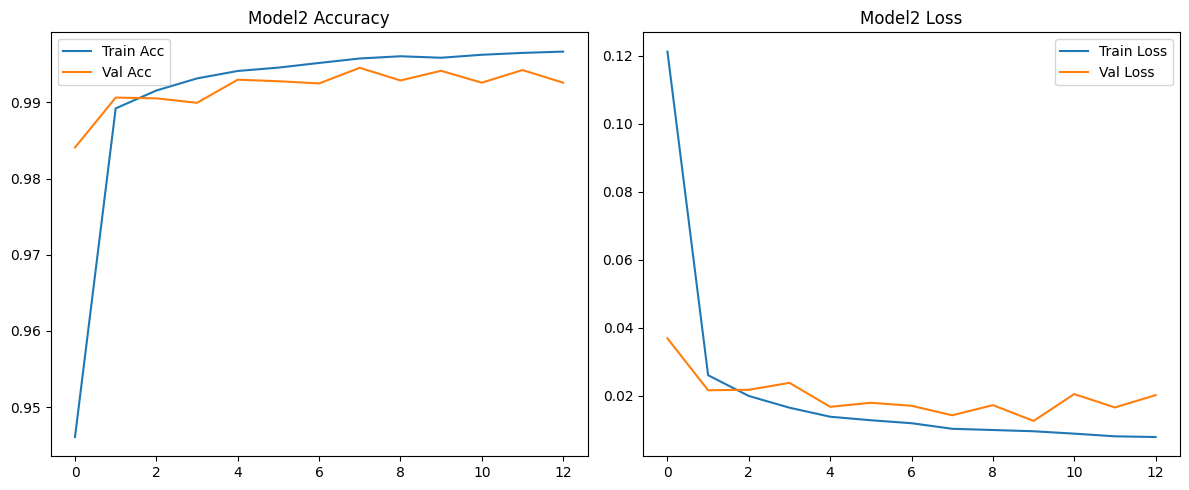

In [81]:
# Plot training and validation accuracy/loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'], label='Train Acc')
plt.plot(history2.history['val_accuracy'], label='Val Acc')
plt.title('Model2 Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'], label='Train Loss')
plt.plot(history2.history['val_loss'], label='Val Loss')
plt.title('Model2 Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [82]:
# Predictions on test data
y_pred2 = model2.predict(X_test)
y_pred2 = (y_pred2 > 0.5).astype(int)

686/686 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [83]:
y_pred2[:10]

array([[0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0]])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17062
           1       0.99      0.99      0.99      4868

    accuracy                           0.99     21930
   macro avg       0.99      0.99      0.99     21930
weighted avg       0.99      0.99      0.99     21930



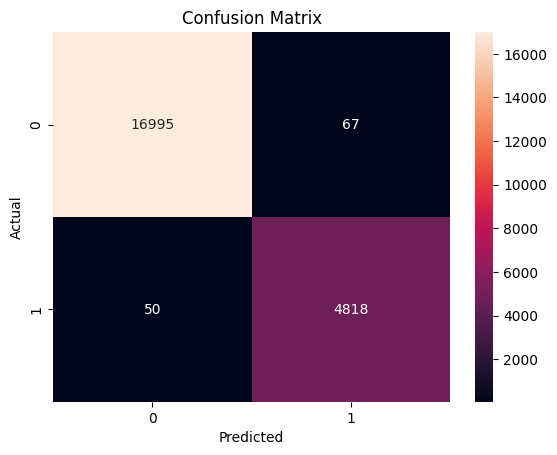

In [84]:
# Prediction

print(classification_report(y_test, y_pred2))            # Print precision, recall, F1

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred2), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()